In [1]:

#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']= 300

from mlxtend.frequent_patterns import association_rules,apriori

#Avoid unnecessary messages
import warnings
warnings.filterwarnings('ignore')

# Books

In [2]:
df = pd.read_csv('D:\\Data Science Assignments\\Assignment 9 Association Rule\\book.csv')
df

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [3]:
df.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.isna().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

# Rule 1) For 10% support & 70% confidence

In [5]:
scores = apriori(df,min_support=0.1, use_colnames=True)
scores

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


In [6]:
rules = association_rules(scores, metric='lift',min_threshold=0.7)
rules.sort_values('confidence' , ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf,0.641850
83,"(ArtBks, DoItYBks)",(CookBks),0.1235,0.4310,0.1015,0.821862,1.906873,0.048272,3.194159,0.542591
89,"(GeogBks, DoItYBks)",(CookBks),0.1325,0.4310,0.1085,0.818868,1.899926,0.051392,3.141354,0.546010
95,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
54,"(RefBks, ChildBks)",(CookBks),0.1515,0.4310,0.1225,0.808581,1.876058,0.057204,2.972534,0.550345
...,...,...,...,...,...,...,...,...,...,...
92,(CookBks),"(GeogBks, DoItYBks)",0.4310,0.1325,0.1085,0.251740,1.899926,0.051392,1.159357,0.832449
74,(ChildBks),"(GeogBks, DoItYBks)",0.4230,0.1325,0.1045,0.247045,1.864490,0.048452,1.152127,0.803571
80,(ChildBks),"(ArtBks, GeogBks)",0.4230,0.1275,0.1020,0.241135,1.891253,0.048067,1.149743,0.816724
98,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237,0.824355


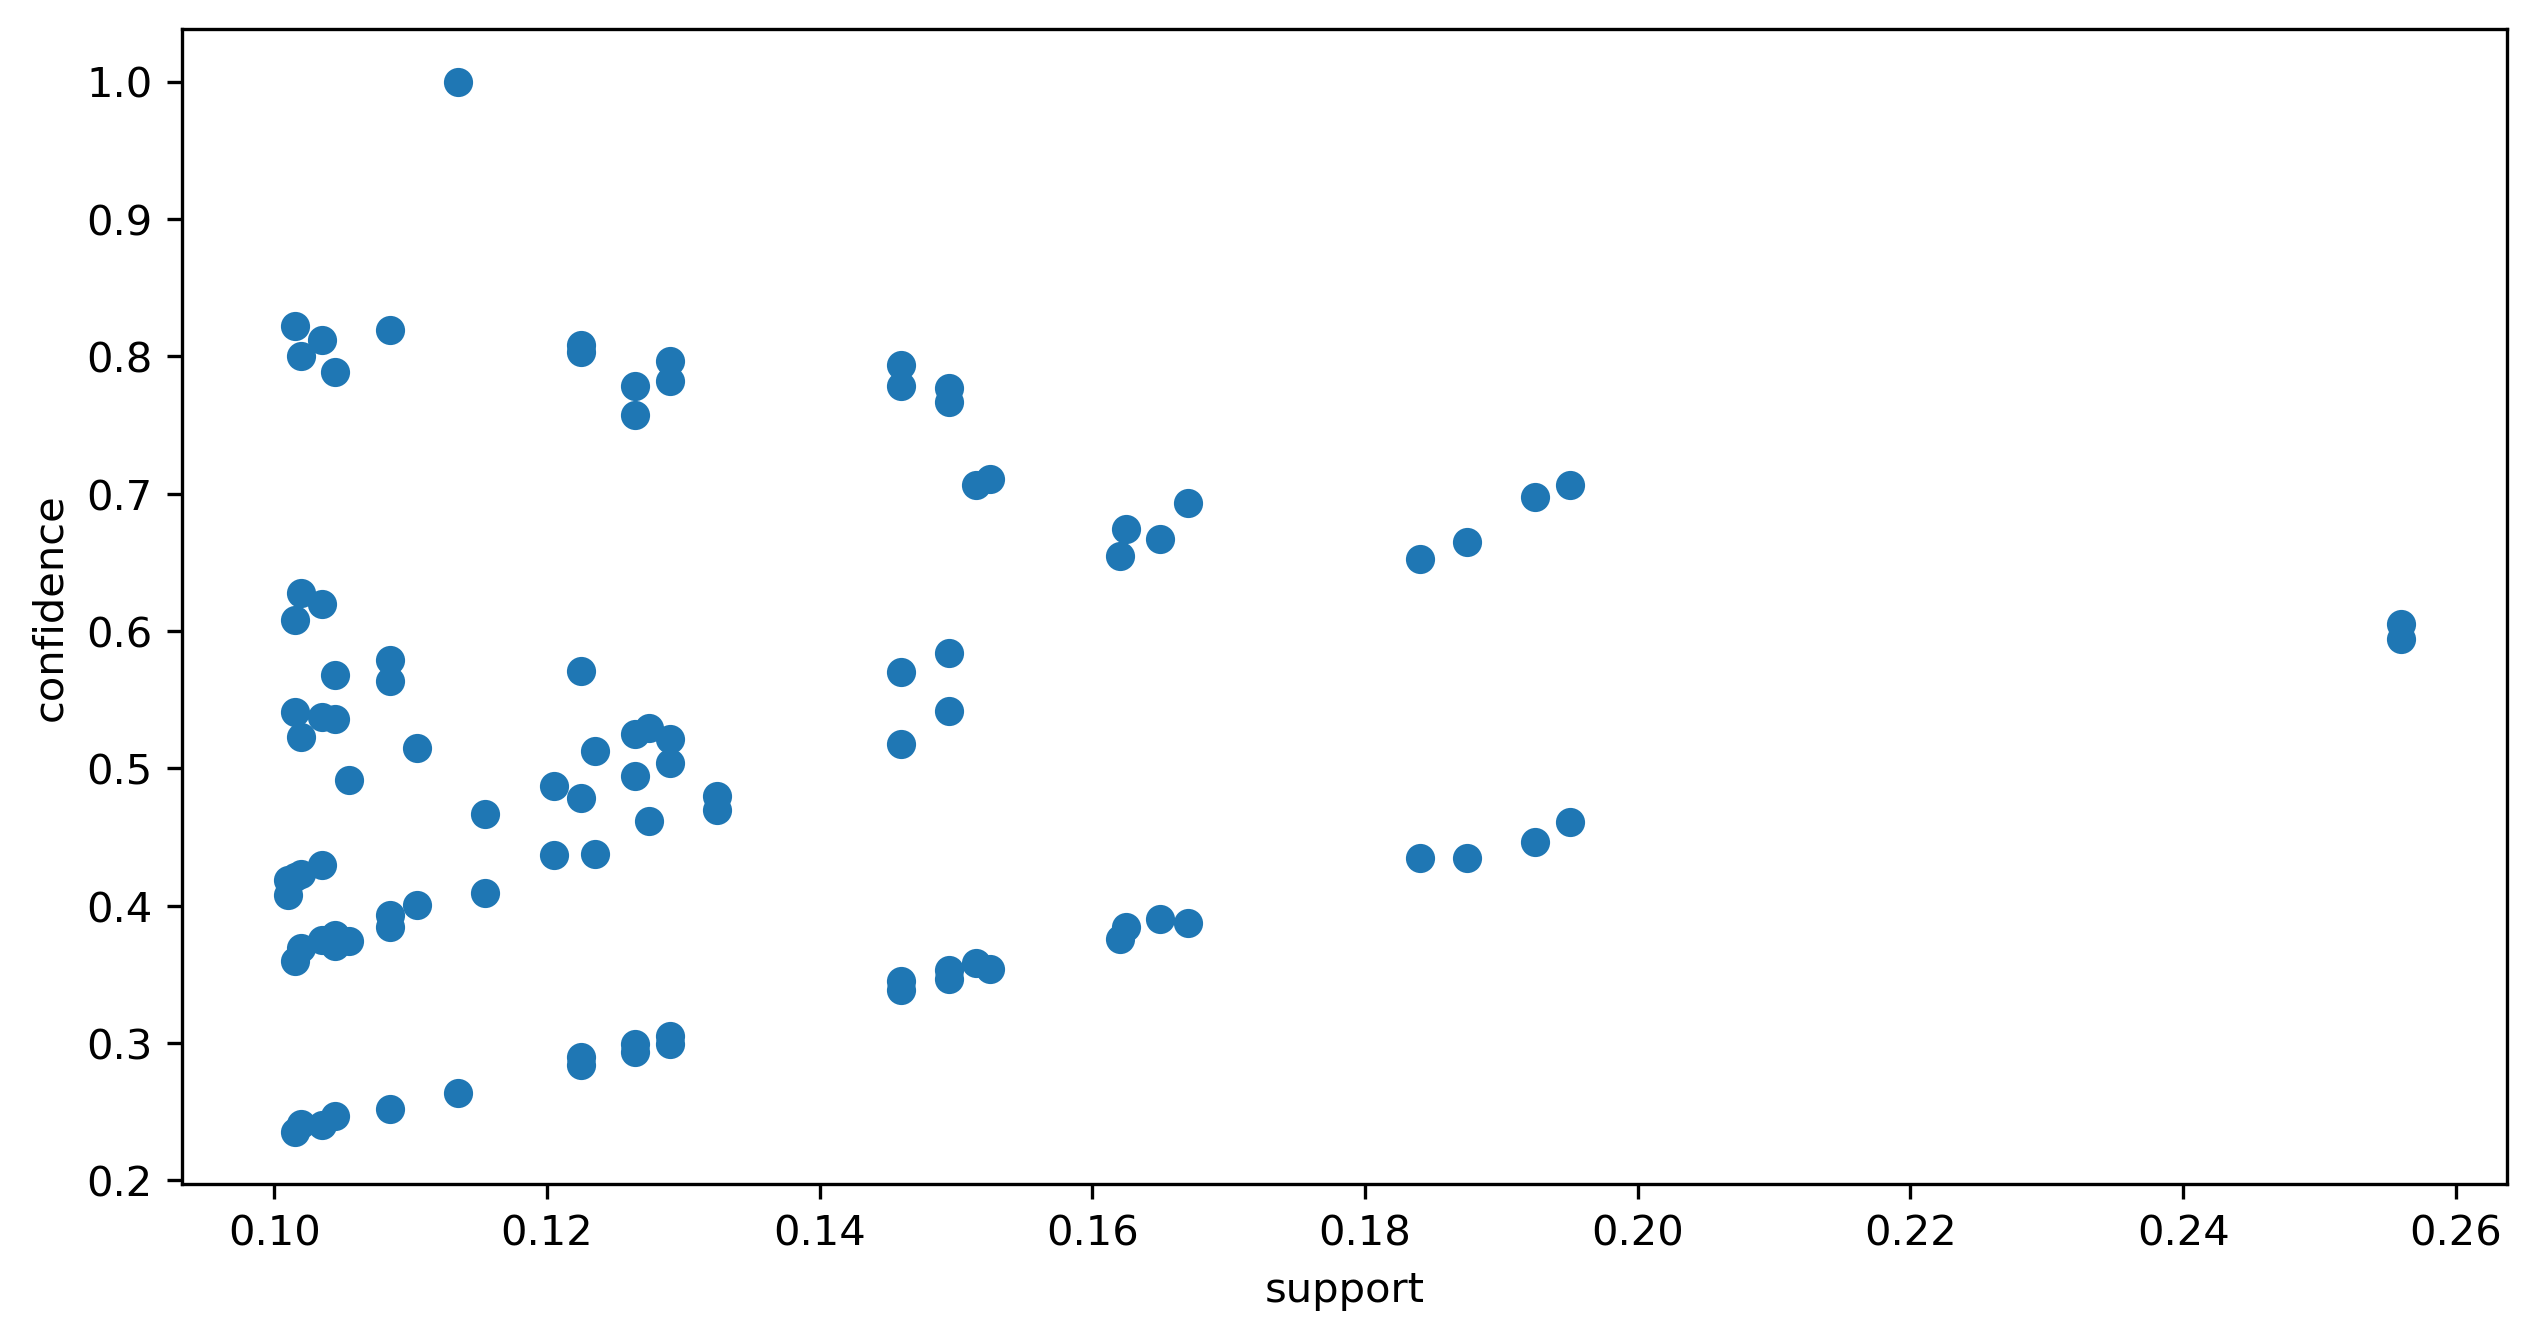

In [7]:
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

# Rule 2) For 20% support & 70% confidence

In [8]:
scores = apriori(df,min_support=0.2, use_colnames=True)
scores

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(CookBks, ChildBks)"


In [9]:
rules = association_rules(scores,metric='lift',min_threshold=0.7)
rules.sort_values('confidence' , ascending=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069,0.505870
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240,0.498856


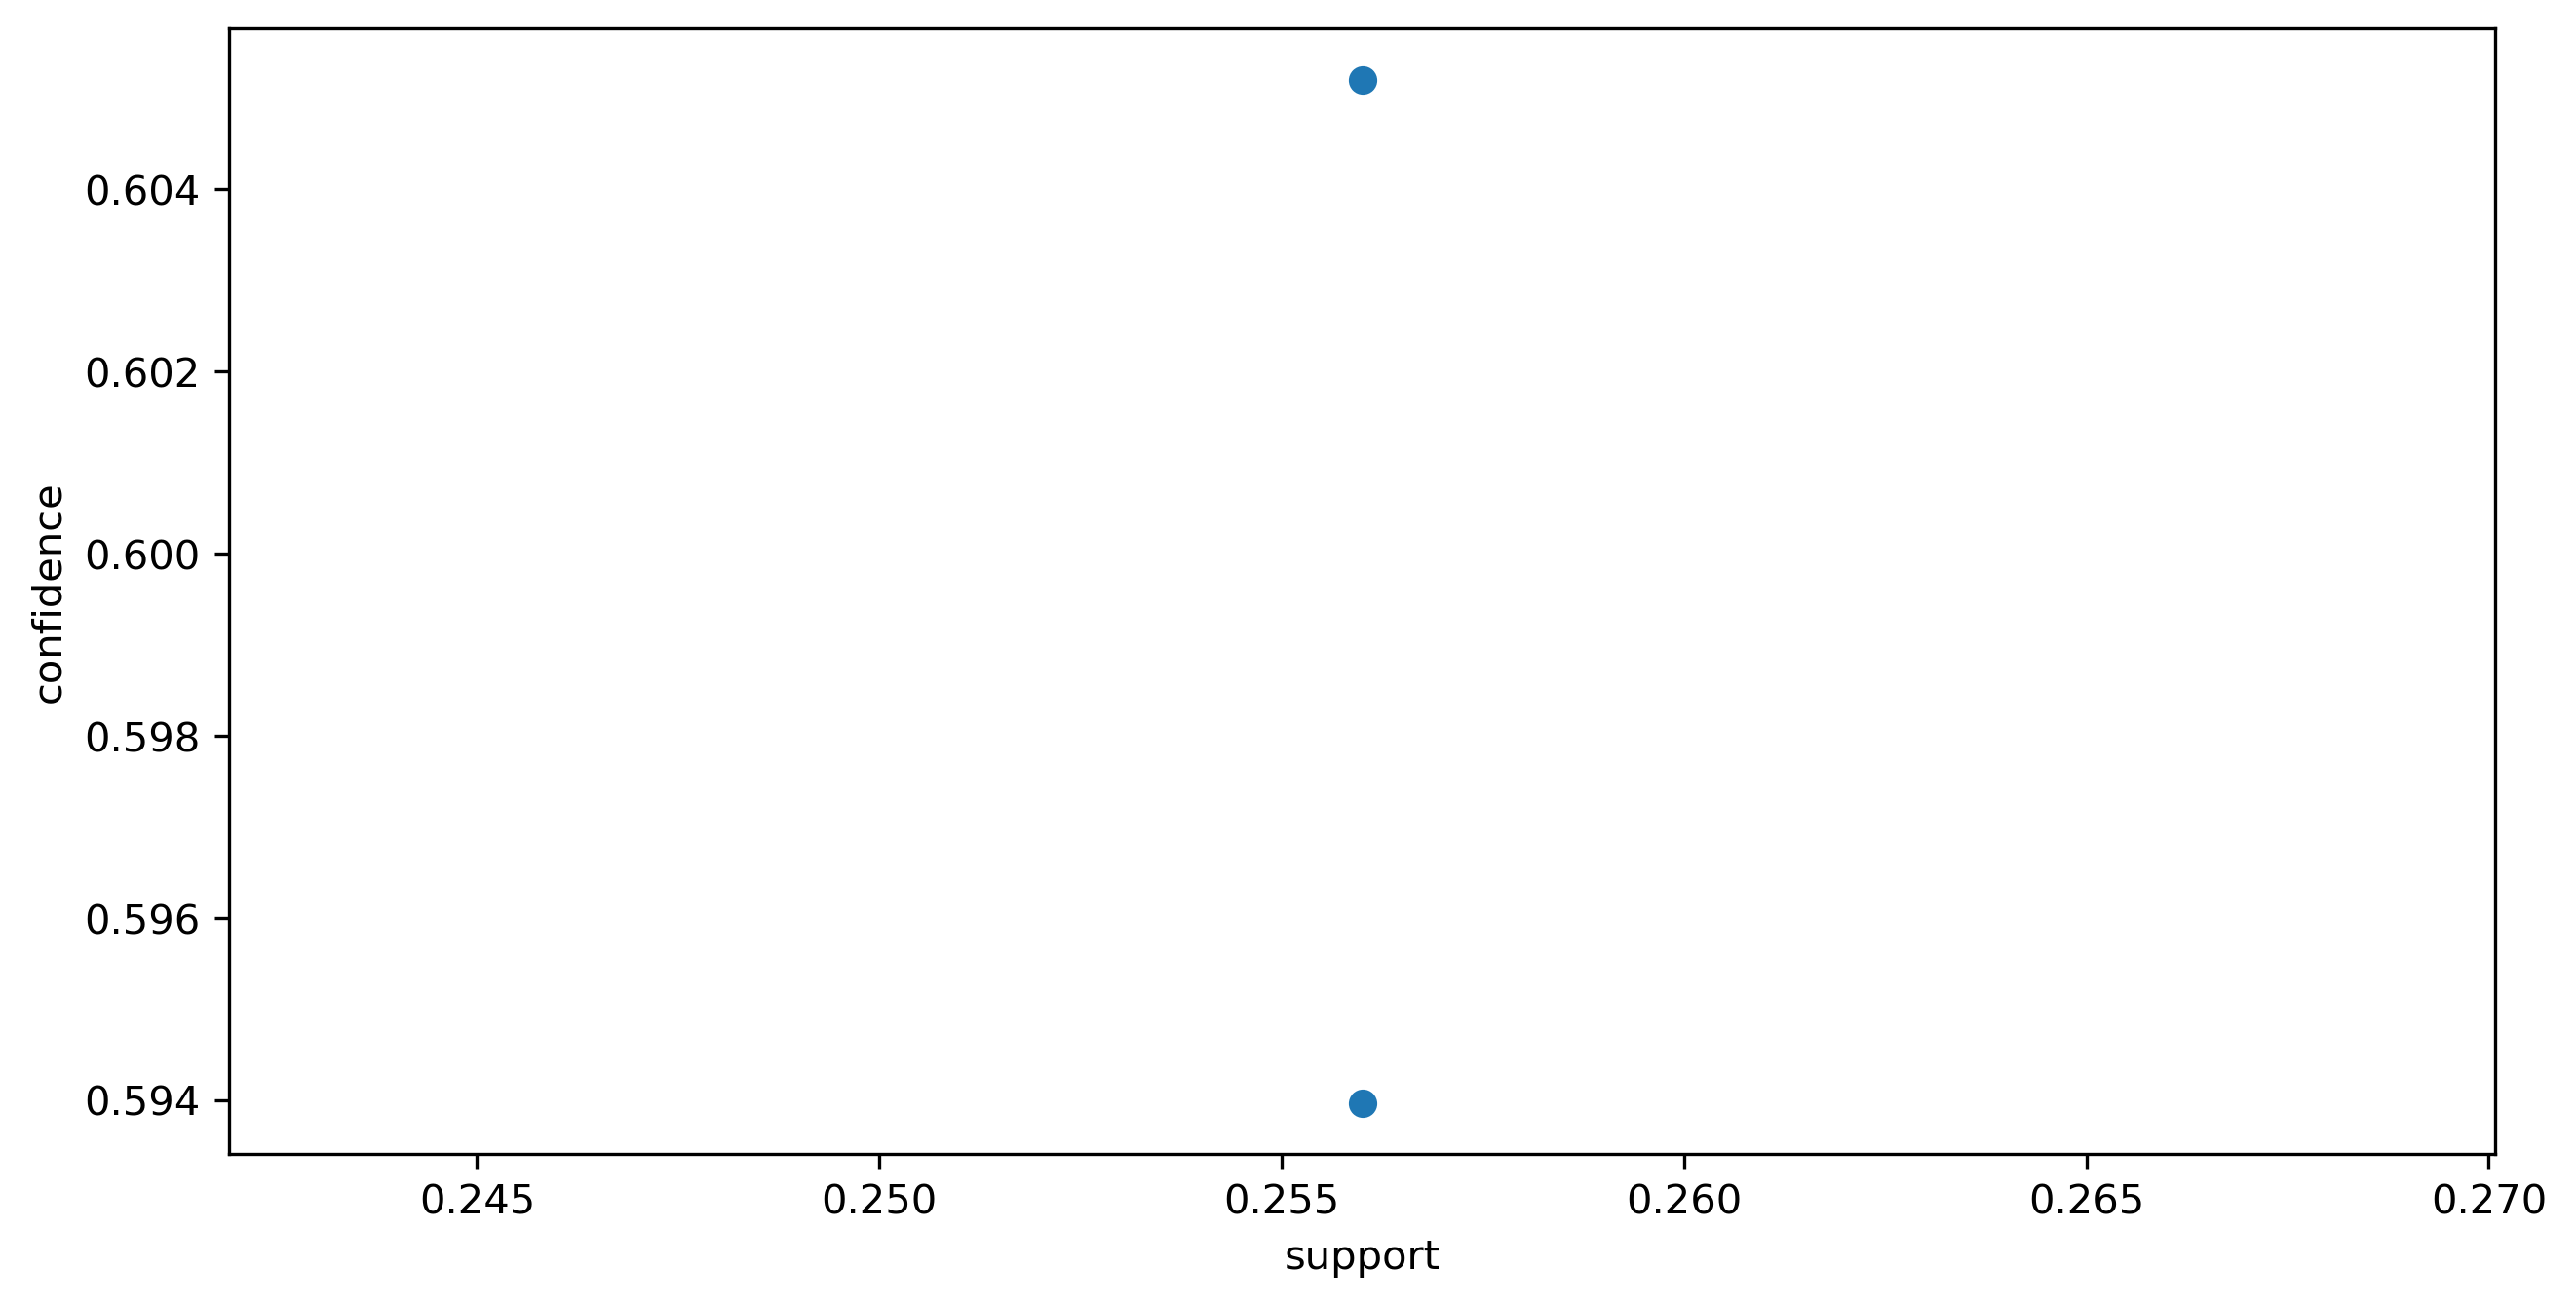

In [10]:
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

# Rule 3) For 5% support & 90% confidence

In [11]:
scores = apriori(df,min_support=0.05, use_colnames=True)
scores

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(GeogBks, CookBks, YouthBks, DoItYBks)"
96,0.0560,"(GeogBks, ArtBks, CookBks, YouthBks)"
97,0.0650,"(GeogBks, ArtBks, CookBks, DoItYBks)"
98,0.0510,"(CookBks, YouthBks, DoItYBks, ChildBks, GeogBks)"


In [12]:
rules = association_rules(scores,metric='lift',min_threshold=0.9)
rules.sort_values('confidence' , ascending=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770,0.609543
...,...,...,...,...,...,...,...,...,...,...
657,(CookBks),"(GeogBks, ArtBks, ChildBks, DoItYBks)",0.4310,0.0595,0.0535,0.124130,2.086217,0.027856,1.073789,0.915050
658,(ArtBks),"(GeogBks, CookBks, DoItYBks, ChildBks)",0.2410,0.0890,0.0535,0.221992,2.494289,0.032051,1.170939,0.789307
659,(DoItYBks),"(ArtBks, CookBks, GeogBks, ChildBks)",0.2820,0.0835,0.0535,0.189716,2.272052,0.029953,1.131085,0.779762
660,(ChildBks),"(GeogBks, ArtBks, CookBks, DoItYBks)",0.4230,0.0650,0.0535,0.126478,1.945808,0.026005,1.070379,0.842417


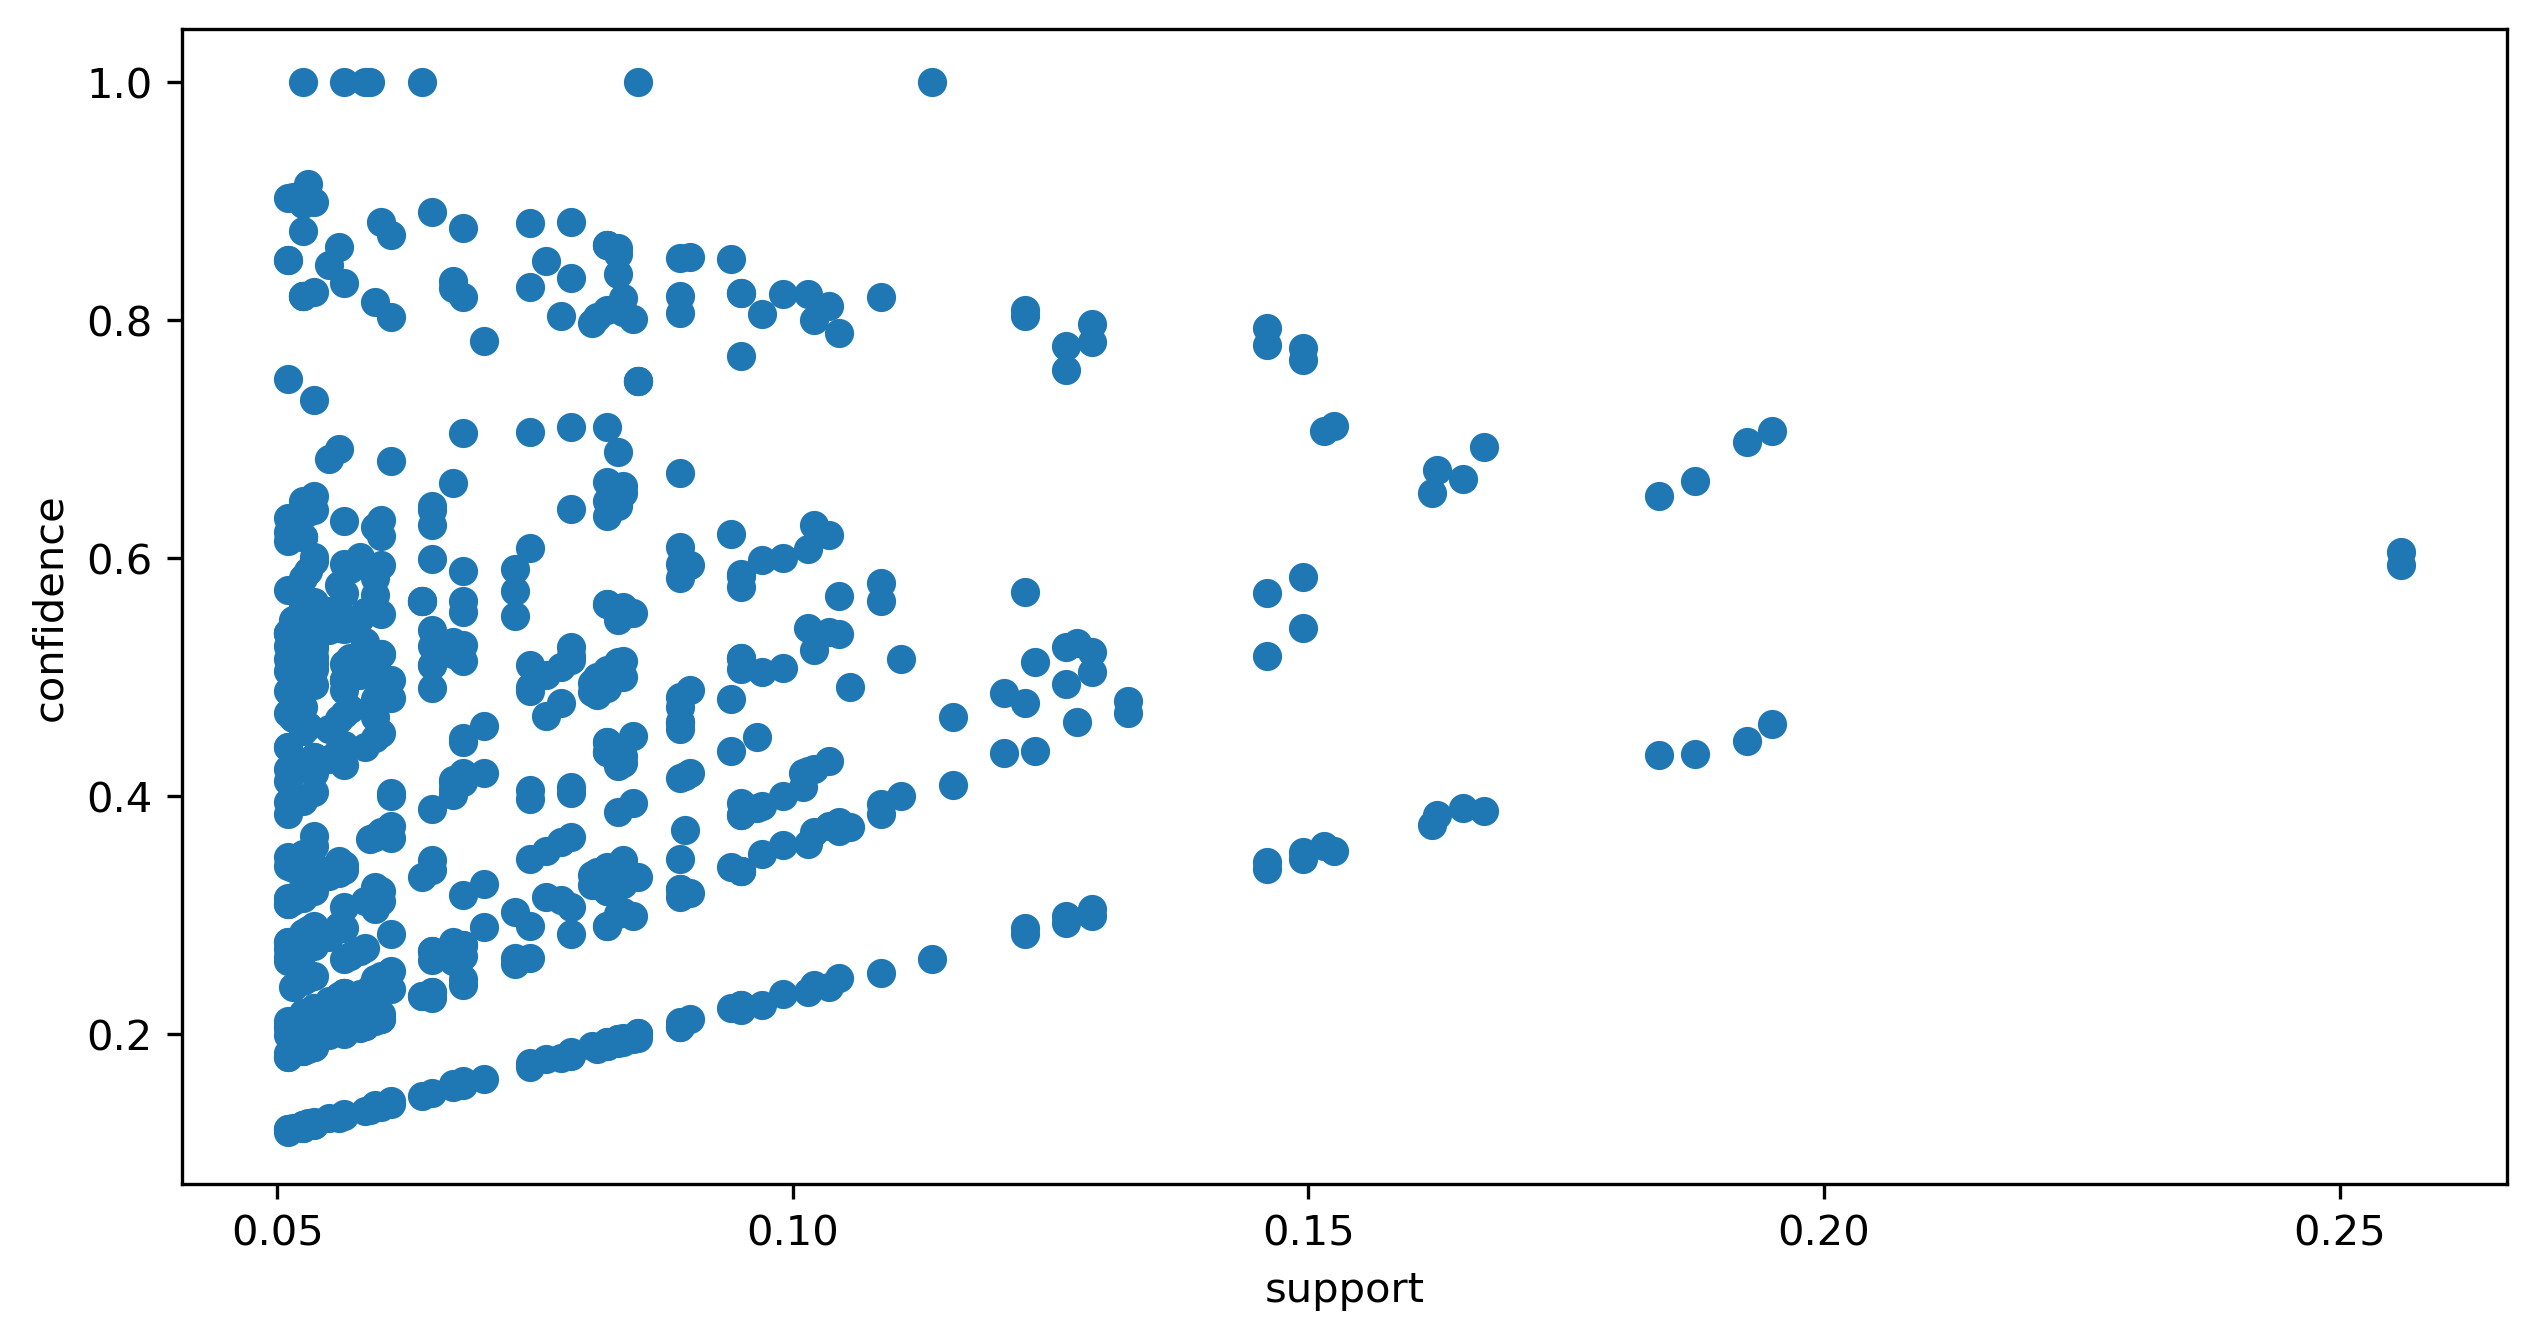

In [13]:
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

# Movies

In [14]:
df = pd.read_csv('D:\Data Science Assignments\Assignment 9 Association Rule\my_movies.csv')
df

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [15]:
df = df.loc[:,'Sixth Sense':]

In [16]:
df.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
df.isna().sum()

Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

# Rule 1) For 5% support & 90% confidence

In [18]:
scores = apriori(df,min_support=0.05, use_colnames=True)
scores

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [19]:
rules = association_rules(scores , metric='lift' ,min_threshold= 0.9)
rules.sort_values('confidence' , ascending= False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
119,"(Harry Potter1, LOTR2)",(Green Mile),0.1,0.2,0.1,1.000000,5.000000,0.08,inf,0.888889
167,"(Sixth Sense, Green Mile, LOTR2)",(LOTR1),0.1,0.2,0.1,1.000000,5.000000,0.08,inf,0.888889
154,"(Green Mile, Harry Potter1, LOTR1)",(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf,0.444444
155,"(Sixth Sense, Green Mile, LOTR1)",(Harry Potter1),0.1,0.2,0.1,1.000000,5.000000,0.08,inf,0.888889
90,"(Gladiator, Braveheart)",(Patriot),0.1,0.6,0.1,1.000000,1.666667,0.04,inf,0.444444
...,...,...,...,...,...,...,...,...,...,...
11,(Gladiator),(LOTR),0.7,0.1,0.1,0.142857,1.428571,0.03,1.05,1.000000
92,(Gladiator),"(Patriot, Braveheart)",0.7,0.1,0.1,0.142857,1.428571,0.03,1.05,1.000000
99,(Gladiator),"(Green Mile, LOTR)",0.7,0.1,0.1,0.142857,1.428571,0.03,1.05,1.000000
42,(Gladiator),"(Sixth Sense, LOTR)",0.7,0.1,0.1,0.142857,1.428571,0.03,1.05,1.000000


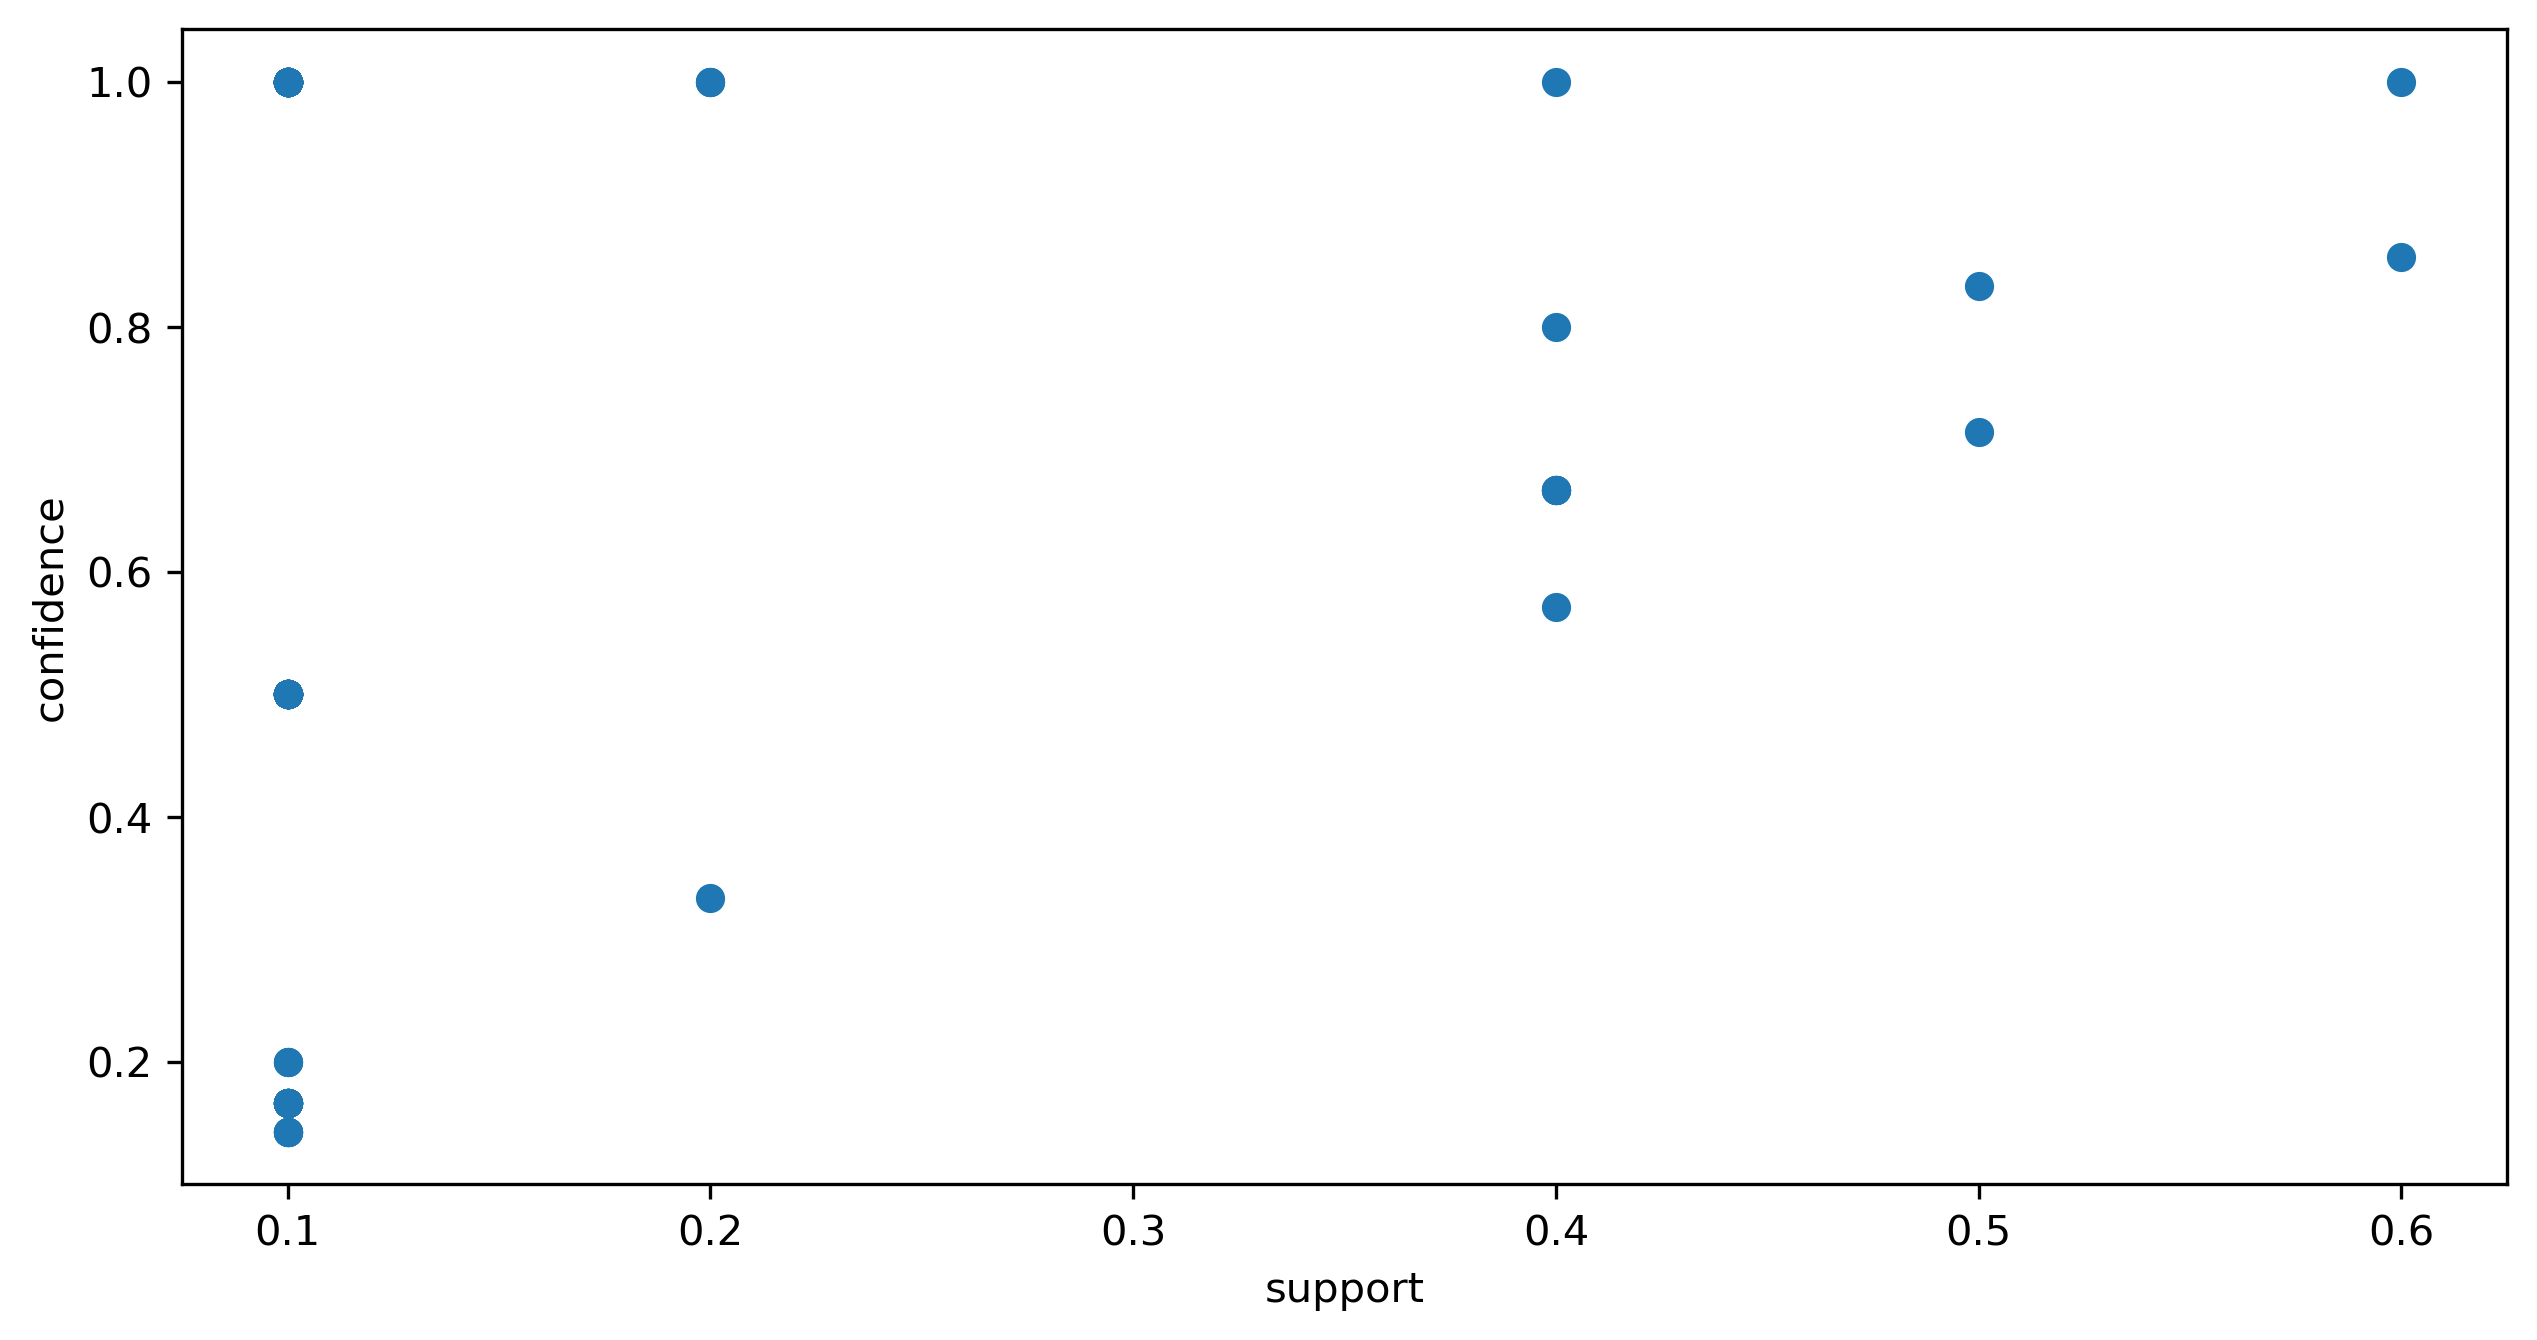

In [20]:
# visualization of obtained rule
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

# Rule 2) For 10% support & 80% confidence

In [21]:
scores = apriori(df,min_support=0.01, use_colnames=True)
scores

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [22]:
rules = association_rules(scores, metric='lift' , min_threshold=0.8)
rules.sort_values('confidence' , ascending=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,0.533333
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96,-0.333333
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80,-0.200000
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96,-0.333333
...,...,...,...,...,...,...,...,...,...,...
241,(Sixth Sense),"(Green Mile, Harry Potter1, LOTR1, LOTR2)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000
242,(Harry Potter1),"(Sixth Sense, Green Mile, LOTR1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
243,(LOTR1),"(Green Mile, Sixth Sense, Harry Potter1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
244,(Green Mile),"(Sixth Sense, Harry Potter1, LOTR1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000


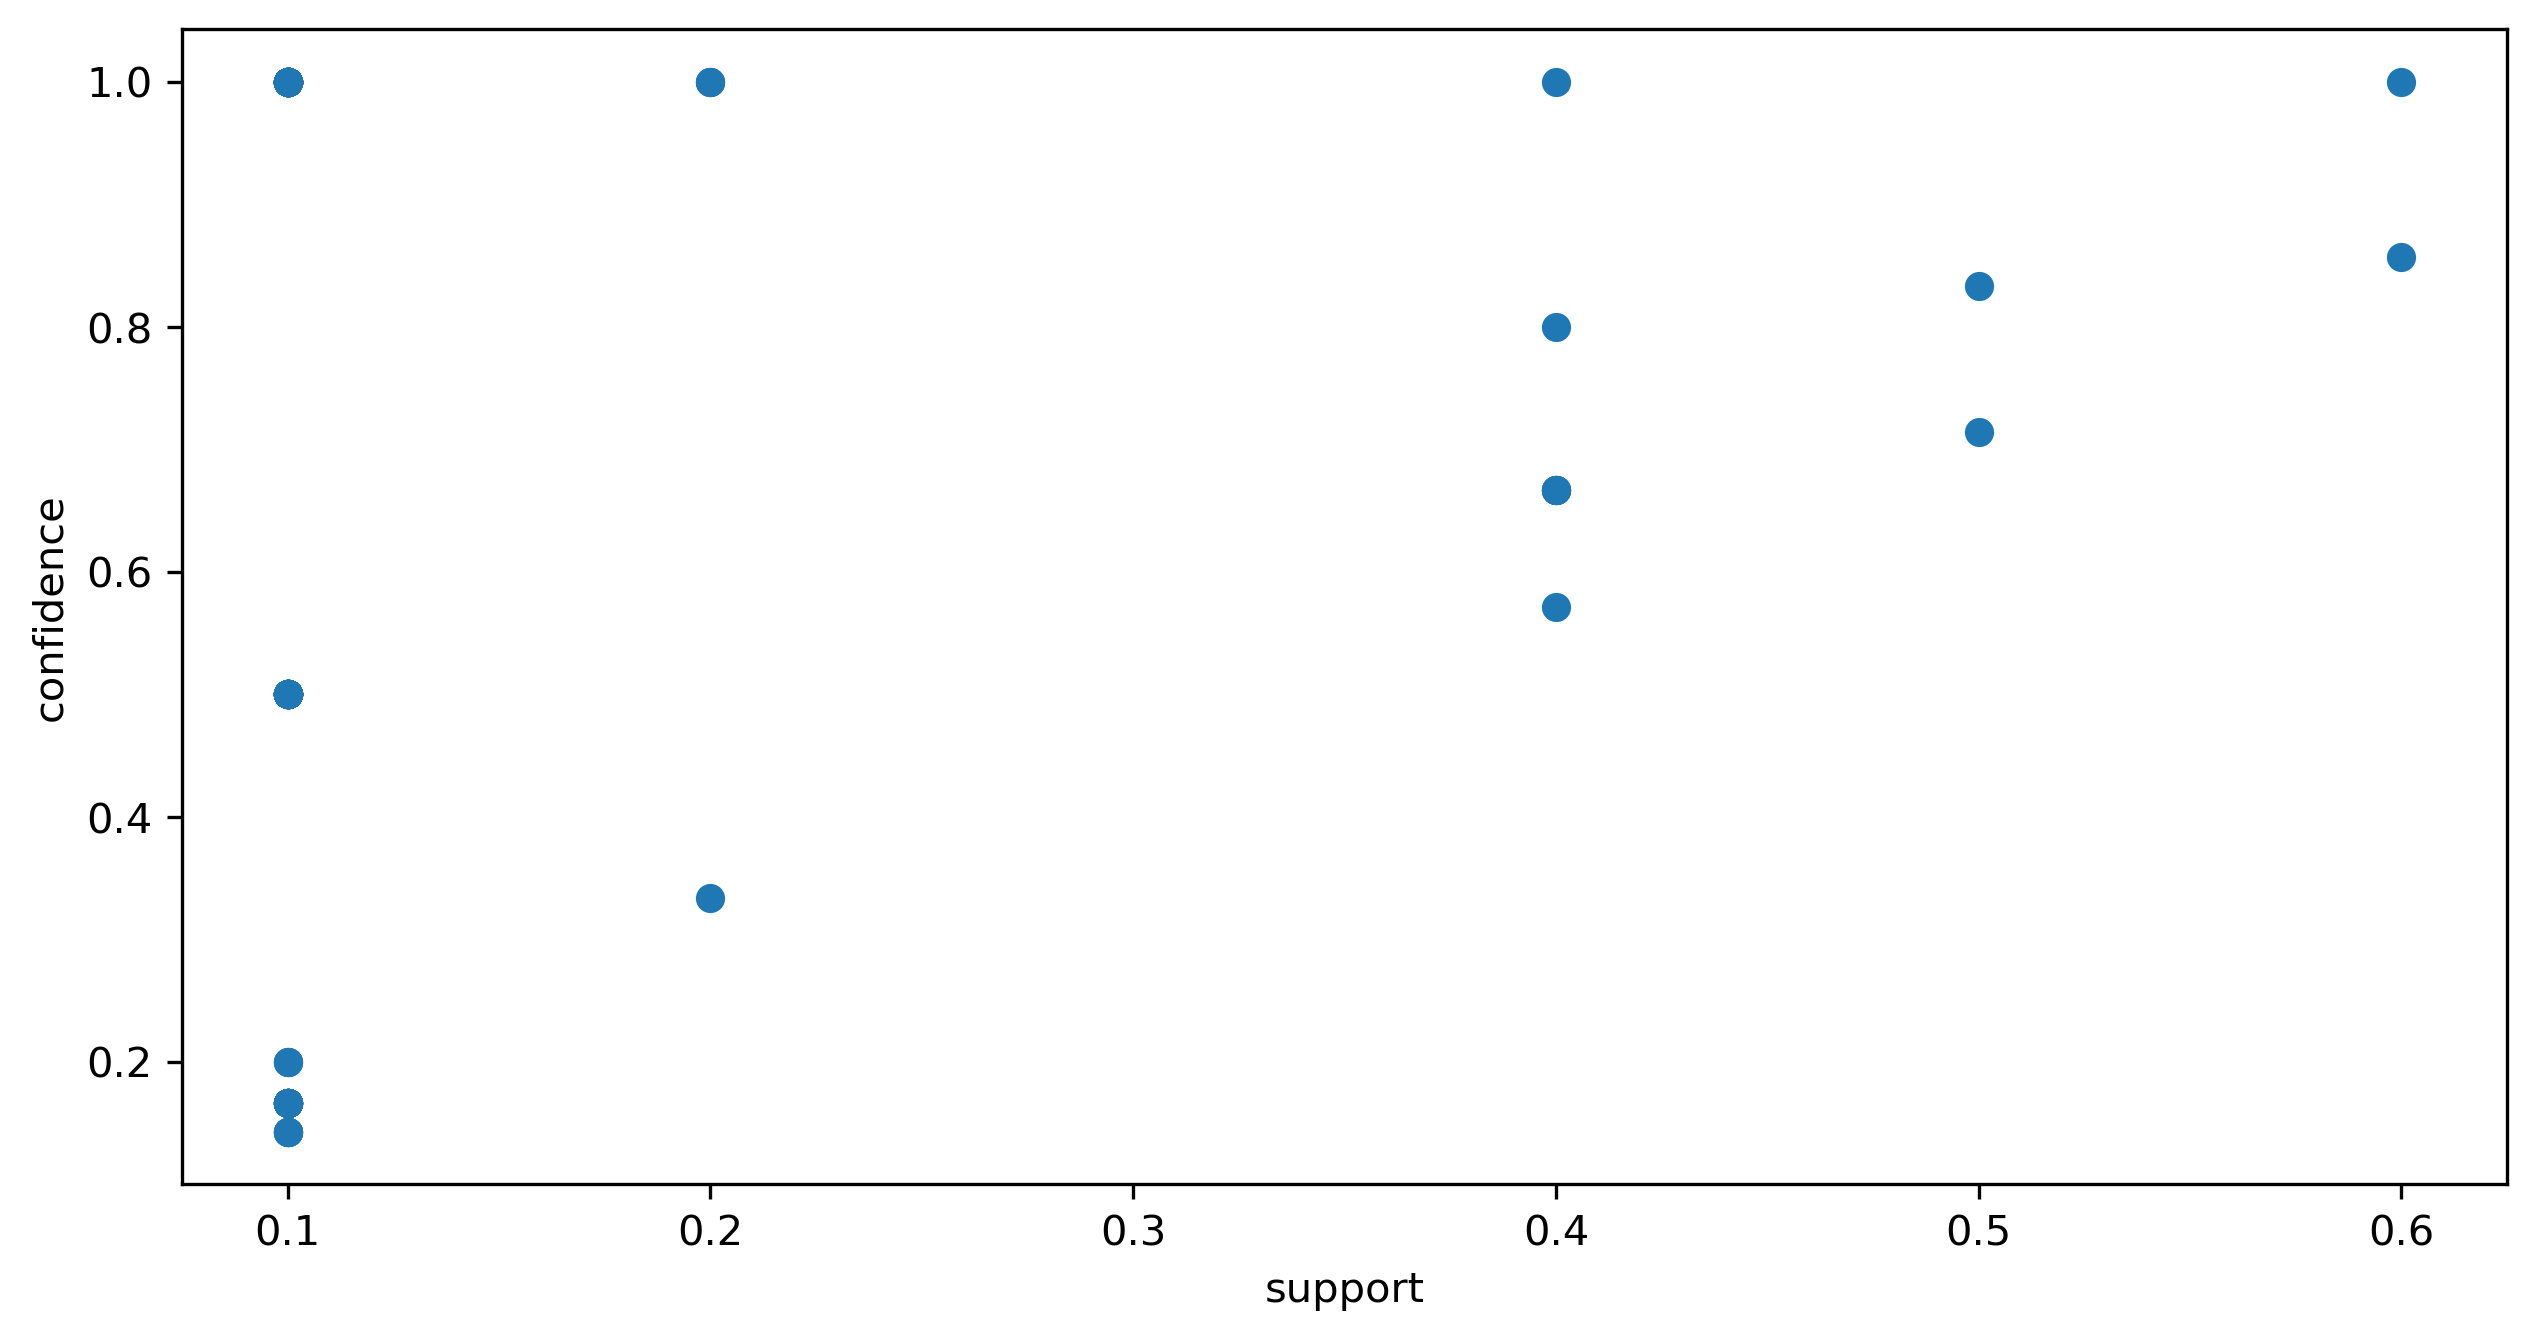

In [23]:
# visualization of obtained rule
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

# Rule 3) For 15% support & 80% confidence

In [24]:
scores = apriori(df,min_support=0.15, use_colnames=True)
scores

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Sixth Sense, Gladiator)"
8,0.4,"(Sixth Sense, Patriot)"
9,0.2,"(Sixth Sense, Green Mile)"


In [25]:
rules = association_rules(scores,metric='lift' , min_threshold=0.8)
rules.sort_values('confidence' , ascending=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2,1.000000
5,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
7,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
9,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000


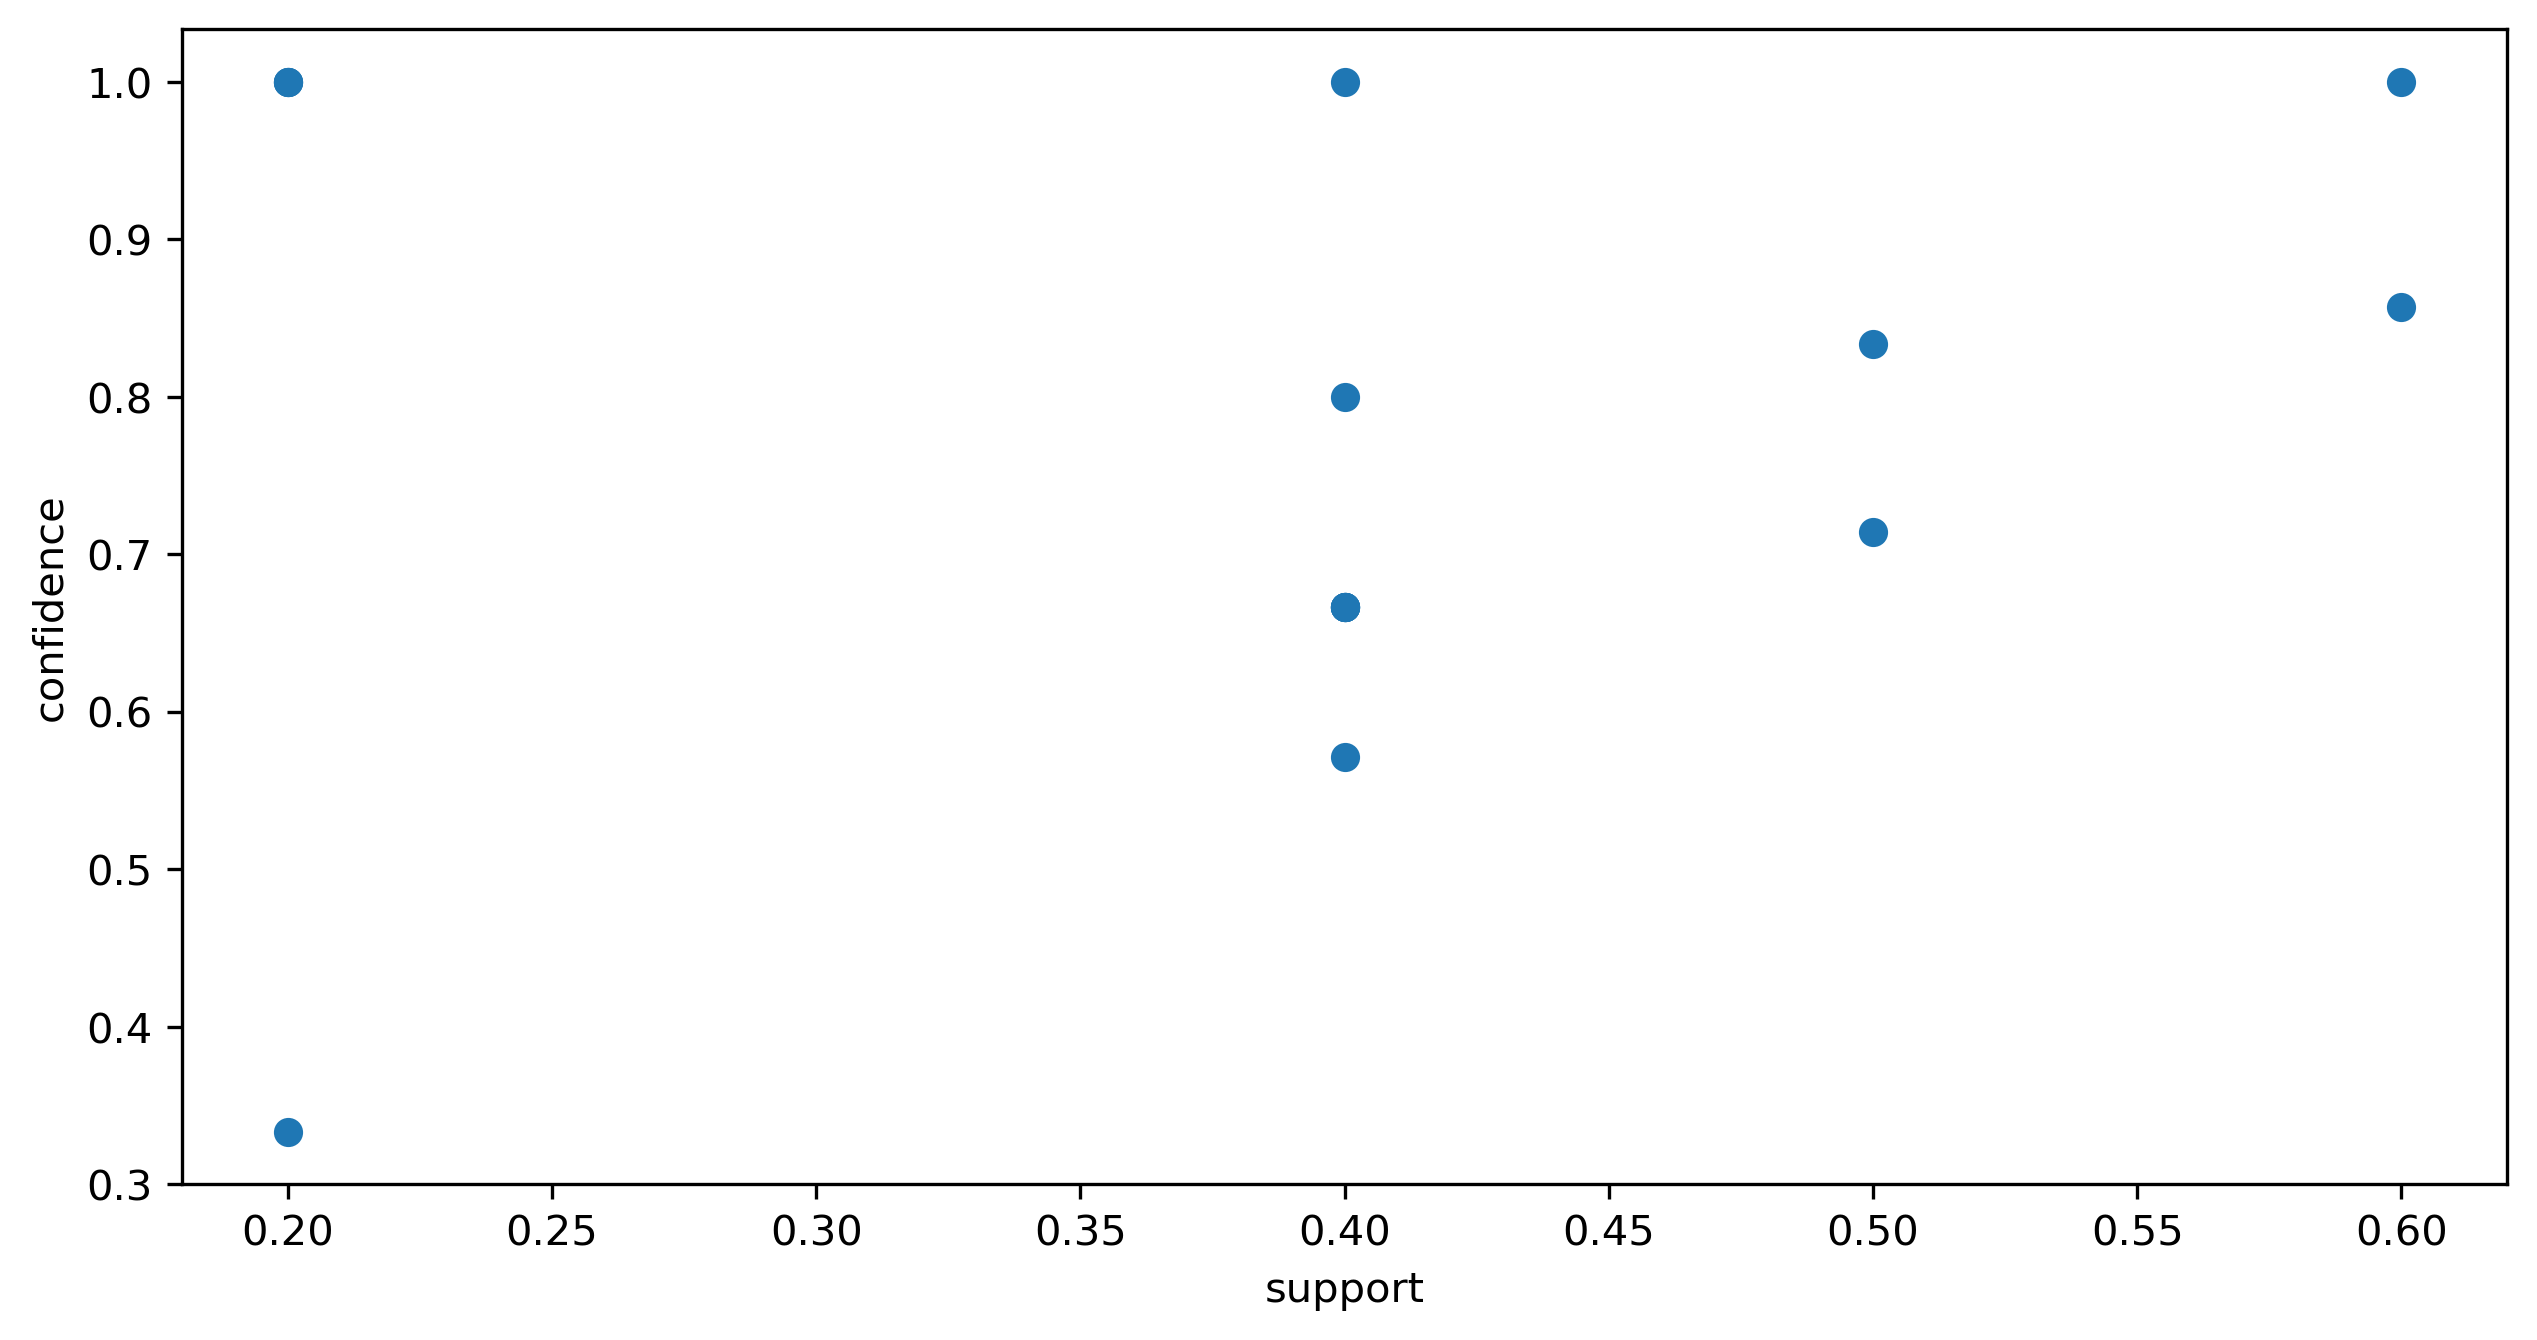

In [26]:
# visualization of obtained rule
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()